---
# Scikit-learn exercises 

---
These are introductory exercises in Machine learning with focus in **scikit-learn** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 

&nbsp; c) Make some plots on some of the columns that you find interesting.

&nbsp; d) Check if there are any columns you might want to drop. 

<details>

<summary>Answer</summary>

a) I have chosen to drop the rows, but it doesn't neccessary have to be the best method. Maybe some NaNs should be filled somehow?

b)
|      |      mpg |   cylinders |   displacement |   horsepower |   weight |   acceleration |
|:-----|---------:|------------:|---------------:|-------------:|---------:|---------------:|
| mean | 23.4459  |     5.47194 |        194.412 |     104.469  | 2977.58  |       15.5413  |
| std  |  7.80501 |     1.70578 |        104.644 |      38.4912 |  849.403 |        2.75886 |
| min  |  9       |     3       |         68     |      46      | 1613     |        8       |
| 25%  | 17       |     4       |        105     |      75      | 2225.25  |       13.775   |
| 50%  | 22.75    |     4       |        151     |      93.5    | 2803.5   |       15.5     |
| 75%  | 29       |     8       |        275.75  |     126      | 3614.75  |       17.025   |
| max  | 46.6     |     8       |        455     |     230      | 5140     |       24.8     |


c) Here are some example plots

<img src="../assets/EDA_mpg.png" height="400"/>

d) I have chosen to drop the columns origin and name. Think yourself if it is reasonable and feel free to experiment. Also there might be some domain experts in our class, that you can ask. 

</details>

---

In [18]:
import pandas as pd # Importing pandas for dataframes
import seaborn as sns # importing seaborn for plotting

df = sns.load_dataset("mpg", cache=True, data_home=None) # this is a dataframe from seaborns collection
df.info(), df.describe() # doing some analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


(None,
               mpg   cylinders  displacement  horsepower       weight  \
 count  398.000000  398.000000    398.000000  392.000000   398.000000   
 mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
 std      7.815984    1.701004    104.269838   38.491160   846.841774   
 min      9.000000    3.000000     68.000000   46.000000  1613.000000   
 25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
 50%     23.000000    4.000000    148.500000   93.500000  2803.500000   
 75%     29.000000    8.000000    262.000000  126.000000  3608.000000   
 max     46.600000    8.000000    455.000000  230.000000  5140.000000   
 
        acceleration  model_year  
 count    398.000000  398.000000  
 mean      15.568090   76.010050  
 std        2.757689    3.697627  
 min        8.000000   70.000000  
 25%       13.825000   73.000000  
 50%       15.500000   76.000000  
 75%       17.175000   79.000000  
 max       24.800000   82.000000  )

In [19]:
df = df.drop(columns=["model_year", "name", "origin"]) # dropping columns that are not of interest.
df = df.fillna(0) # filling in any nan values with 0, There was only 6 in the horsepower section, This will add outliners

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 18.8 KB


<AxesSubplot: xlabel='mpg', ylabel='displacement'>

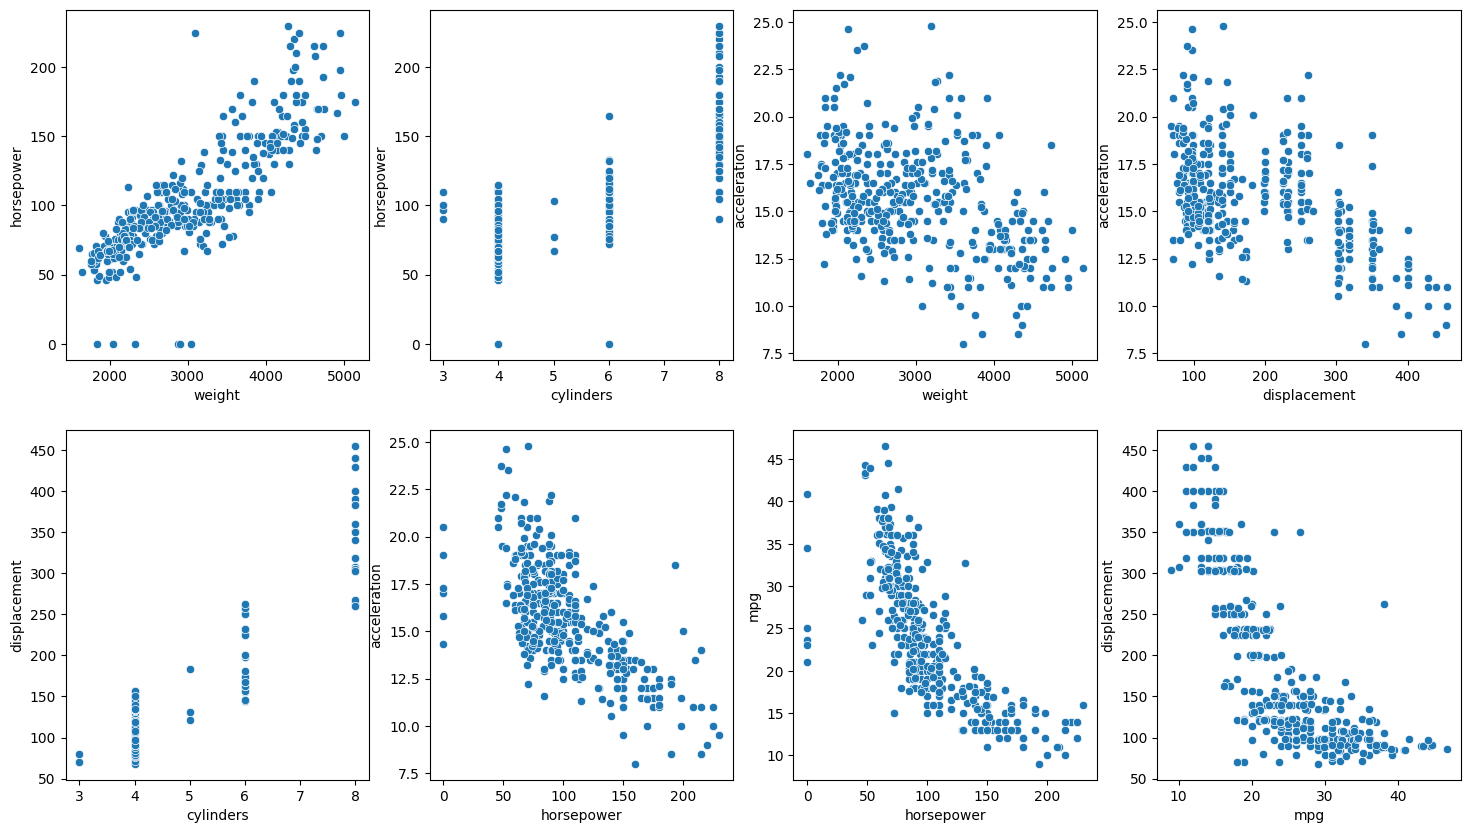

In [56]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize= (18,10))

#Investigating some different features

sns.scatterplot(ax= ax[0,0], data= df, x= "weight", y="horsepower")
sns.scatterplot(ax= ax[0,1], data=df, x= "cylinders", y="horsepower")
sns.scatterplot(ax=ax[0,2], data=df, x= "weight", y= "acceleration" )
sns.scatterplot(ax=ax[0,3], data= df, x="displacement", y="acceleration")
sns.scatterplot(ax=ax[1,0], data= df, x="cylinders", y="displacement")
sns.scatterplot(ax=ax[1,1], data=df, x="horsepower", y="acceleration")
sns.scatterplot(ax=ax[1,2], data= df, y="mpg", x="horsepower")
sns.scatterplot(ax=ax[1,3], data=df, x="mpg", y="displacement")

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

<details>

<summary>Answer</summary>

Do a manual calculation to check against the shapes after train|test split. 

</details>

---

In [64]:
from sklearn.model_selection import train_test_split

X, y = df.drop("mpg", axis="columns"), df["mpg"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((318, 5), (80, 5), (318,), (80,))

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 18.8 KB
